# Load dataset


**Iris Dataset:**
The Iris dataset is a well-known dataset in machine learning and statistics. It's often used as a beginner's dataset for practicing classification algorithms. The dataset contains samples of iris flowers, each belonging to one of three species: setosa, versicolor, and virginica. For each flower sample, there are four features measured: sepal length, sepal width, petal length, and petal width. The goal of using this dataset is typically to classify iris flowers into their respective species based on these measured features.

**X (Features):**
In the context of this code, `X` is a variable that stores the features (attributes) of the iris dataset that we are using for classification. In this specific case, `X` contains only the measurements of petal length and petal width for each iris flower. These two features are stored as a 2-dimensional array. The size of `X` will be `(number of samples, 2)` since there are two features for each sample.

**y (Target Labels):**
`y` is a variable that stores the target labels for the iris dataset. In this dataset, the target labels represent the species of each iris flower. Each target label corresponds to one of the three species: setosa, versicolor, or virginica. The size of `y` will be `(number of samples,)`, meaning it's a 1-dimensional array where each element corresponds to the species label of the corresponding iris flower in the `X` array.

In summary, the code is loading the Iris dataset, extracting the petal length and petal width measurements as features (X), and storing the corresponding species labels in the target variable (y).

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Here's what's happening step by step:

Import train_test_split: The code imports the train_test_split function from the sklearn.model_selection module. This function is commonly used to split datasets into training and testing sets for machine learning.

Splitting the Dataset:

1. X is the feature matrix (petal length and petal width measurements).
2. y is the target array (species labels).
3. test_size=0.3 specifies that 30% of the dataset should be used for testing, and 70% for training.
4. random_state=1 sets a random seed to ensure reproducibility. This means that every time you run the code with random_state=1, you'll get the same train-test split.
5. stratify=y ensures that the class distribution is preserved in both the training and testing sets. It's important for maintaining representative samples of each class in both sets.

Output:

After executing this code, you'll have four sets:
1. X_train: Training features (70% of the data)
2. X_test: Testing features (30% of the data)
3. y_train: Training target labels (corresponding to X_train)
4. y_test: Testing target labels (corresponding to X_test)

The purpose of splitting the dataset is to train a machine learning model on the training data and then evaluate its performance on the testing data. This helps you assess how well your model generalizes to new, unseen data.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


To ensure accurate and effective machine learning, it's often necessary to preprocess the data before training a model. One common preprocessing step is feature scaling, which aims to bring all features to a common scale. The `StandardScaler` from the `sklearn.preprocessing` module is a tool that can help achieve this. Let's break down the steps in the following code:

1. **Import the Required Module:**
   We begin by importing the `StandardScaler` class from `sklearn.preprocessing`.

2. **Initialize the Scaler:**
   Create an instance of the `StandardScaler` class. This will be used to standardize the features.

3. **Fit the Scaler:**
   Using the training data (`X_train`), the scaler computes the mean and standard deviation for each feature. These statistics are essential for standardization.

4. **Transform the Data:**
   With the computed mean and standard deviation, the scaler transforms both the training and testing data. This standardization ensures that all features have similar scales.

Let's take a look at the actual code:


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler on the training data
sc.fit(X_train)

# Transform the training and testing data using the scaler
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Next, let's dive into implementing a machine learning model. In this example, we're using the `Perceptron` classifier from `sklearn.linear_model`. The Perceptron is a simple linear classification algorithm.

Here's a breakdown of the code:

1. **Import the Necessary Module:**
   Import the `Perceptron` classifier from `sklearn.linear_model`.

2. **Initialize the Perceptron:**
   Create an instance of the `Perceptron` classifier with the following parameters:
   - `n_iter`: The number of iterations (epochs) for training. Here, we've set it to 40.
   - `eta0`: The learning rate. It determines the step size in updating the weights during training. We've set it to 0.1.
   - `random_state`: Seed for random number generation to ensure reproducibility.

3. **Fit the Perceptron:**
   Use the `fit` method to train the Perceptron on the standardized training data (`X_train_std`) and the corresponding target labels (`y_train`).

Let's see the code in action:

In [4]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron classifier
ppn = Perceptron( max_iter=40, eta0=0.1, random_state=1)

# Train the Perceptron on standardized training data
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [5]:
y_pred = ppn.predict(X_test_std)

After training the machine learning model, it's essential to evaluate its performance. The `accuracy_score` function from `sklearn.metrics` allows us to measure the accuracy of the model's predictions. Let's break down the code:

1. **Import the Necessary Module:**
   Import the `accuracy_score` function from `sklearn.metrics`.

2. **Calculate and Print Accuracy:**
   Use the `accuracy_score` function to compare the actual target labels (`y_test`) with the predicted labels (`y_pred`). Then, print the accuracy score rounded to two decimal places.

Let's see the code in action:


In [6]:
from sklearn.metrics import accuracy_score

# Calculate accuracy and print the result
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.98


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    


/var/folders/2p/8rq7kl1j27nftt5zfzsg8tyc0000gn/T/ipykernel_53776/3858470988.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


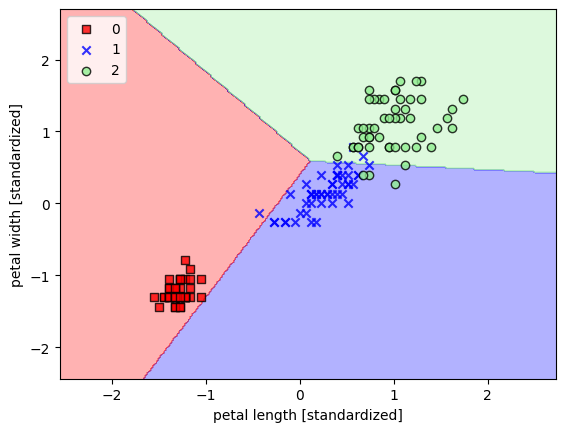

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
